In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8244765957563723142, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5149227510079241619
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15369057649507616622
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14613293312
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7105194334014532089
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# In it, we will try to classify tomato leaf as infected or non-infected

In [ ]:
# Dataset link : https://www.kaggle.com/noulam/tomato#

In [ ]:
!pip install tensorflow-gpu

In [ ]:
# Using tensorflow gpu
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# Resize all the images 
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/valid'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# To skip training existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# to get useful number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
# Layers
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# Structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# Model cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Provide same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 300s 523ms/step - loss: 2.0813 - accuracy: 0.8580 - val_loss: 1.9544 - val_accuracy: 0.8533
Epoch 2/10
574/574 [==============================] - 298s 518ms/step - loss: 1.7982 - accuracy: 0.8670 - val_loss: 1.4113 - val_accuracy: 0.8887
Epoch 3/10
574/574 [==============================] - 289s 503ms/step - loss: 1.6755 - accuracy: 0.8775 - val_loss: 1.8024 - val_accuracy: 0.8730
Epoch 4/10
574/574 [==============================] - 282s 491ms/step - loss: 1.9164 - accuracy: 0.8733 - val_loss: 1.2309 - val_accuracy: 0.9053
Epoch 5/10
574/574 [==============================] - 279s 486ms/step - loss: 1.7274 - accuracy: 0.8832 - val_loss: 1.1670 - val_accuracy: 0.9102
Epoch 6/10
574/574 [==============================] - 279s 487ms/step - loss: 1.8243 - accuracy: 0.8853 - val_loss: 1.5845 - val_accuracy: 0.8908
Epoch 7/10
574/574 [==============================] - 280s 488ms/step - loss: 1.8774 - accuracy: 0.8868 - val_loss: 1.4493 -

In [ ]:
# Matplotlib to visualize
import matplotlib.pyplot as plt

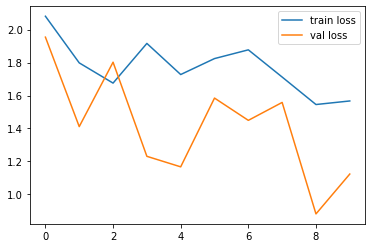

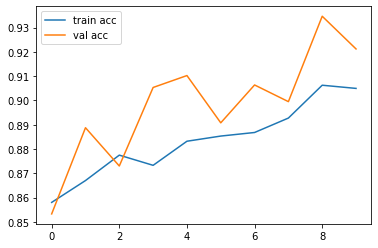

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# To save the file as h5
from tensorflow.keras.models import load_model

model.save('model_inception.h5')